In [1]:
import sys
sys.path.append('../')

import os
from data import datasets
from data.gene_graphs import GeneManiaGraph

import networkx as nx
import matplotlib, matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = datasets.TCGADataset()
G = GeneManiaGraph()
mapping = dict(zip(range(0, len(dataset.df.columns)), dataset.df.columns))
nx_graph = nx.relabel_nodes(G.nx_graph, mapping)

Torrent name: TCGA_tissue_ppi.hdf5, Size: 1748.32MB
Converting one-hot labels to integers
Torrent name: genemania.pkl, Size: 9.61MB


In [3]:
bfs = nx.bfs_edges(nx_graph, "S100A8")

In [4]:
def neighborsOf(graph, nodes, excludes):
    neighbors = set()
    for x in nodes:
        neighbors = neighbors.union(set(graph.neighbors(x)))
    return list(neighbors.difference(set(excludes)))

def removeEdgesBetween(graph, nodes):
    for n1 in nodes:
        for n2 in nodes:
            if graph.has_edge(n1,n2):
                graph.remove_edge(n1,n2)

In [5]:
zero_degree = ["S100A8"]
first_degree = neighborsOf(nx_graph, zero_degree, zero_degree)[:5]
second_degree = neighborsOf(nx_graph, first_degree, first_degree)[:10]
third_degree = neighborsOf(nx_graph, second_degree, second_degree)[:20]

In [6]:
toremove = set(nx_graph.nodes())
toremove = toremove.difference(zero_degree).difference(first_degree).difference(second_degree).difference(third_degree)
nx_graph.remove_nodes_from(toremove)

In [7]:
removeEdgesBetween(nx_graph, first_degree)
removeEdgesBetween(nx_graph, second_degree)
removeEdgesBetween(nx_graph, third_degree)
removeEdgesBetween(nx_graph, first_degree + third_degree)
removeEdgesBetween(nx_graph, zero_degree + second_degree)
removeEdgesBetween(nx_graph, zero_degree + third_degree)

/Users/martinweiss/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-87.27732808983731, 87.2773280898373, -86.82873371307993, 86.82873371307991)

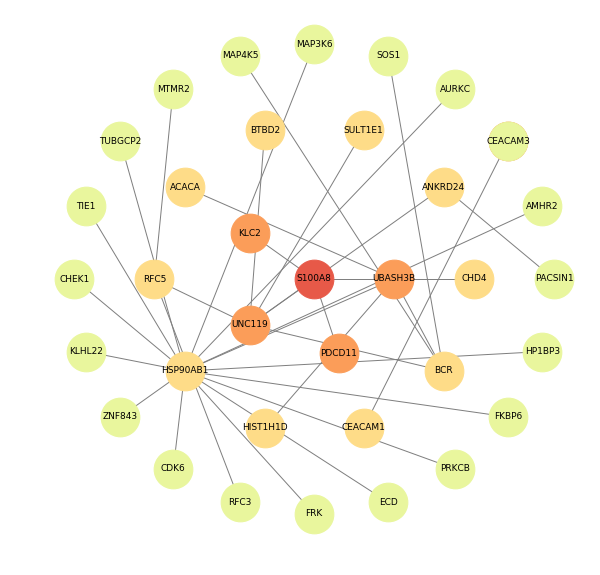

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
shells = [zero_degree, first_degree, second_degree, third_degree]
cmap = matplotlib.cm.get_cmap('Spectral')
#pos = nx.spring_layout(G, k=0.5)
pos = nx.shell_layout(nx_graph, shells, scale=100)
#pos = nx.circular_layout(G)



#nx.draw_networkx(G, pos, node_color="lightblue",with_labels=True, node_size=1000)

nx.draw_networkx_nodes(nx_graph,pos,nodelist=zero_degree, with_labels=True, node_size=1500,node_color=cmap(40))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=first_degree, node_size=1500,node_color=cmap(70))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=second_degree, node_size=1500,node_color=cmap(100))

nx.draw_networkx_nodes(nx_graph,pos,nodelist=third_degree, node_size=1500,node_color=cmap(150))

nx.draw_networkx_edges(nx_graph,pos, edge_color="gray");

nx.draw_networkx_labels(nx_graph,pos,font_size=9);
plt.axis('off')